# 1. **Importing Dependencies:**

In [25]:
import os #helps us to access dataset that we will load
import pandas as pd #data manipulation library
import numpy as np #allow us to do numerical computing
import matplotlib.pyplot as plt #visualize our data
import seaborn as sns #more advanced visualization

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential #neural network model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2. **Loading the Dataset into our Enviornment:**

In [41]:
!pip install kaggle
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 96% 143M/149M [00:00<00:00, 230MB/s]
100% 149M/149M [00:00<00:00, 234MB/s]


In [42]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path): # Loops through items in the root directory
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path): #  Ensures that only directories (representing classes) are processed.

      for image in os.listdir(label_path): # Loops through images in each class directory
        image_path = os.path.join(label_path, image) # Constructs the full path to images and directories.

        classes.append(label) # Adds the class label (subdirectory name) to the classes list.
        class_paths.append(image_path) # Adds the full image path to the class_paths list.

  # Create a DataFrame with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })
  return df

# 3. **Data Pre-Processing:**

## 3.1 **Seperating Training, Testing, and Validation datasets:**

In [43]:
tr_df = get_class_paths("/content/Training")

tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_1133.jpg,glioma
1,/content/Training/glioma/Tr-gl_1274.jpg,glioma
2,/content/Training/glioma/Tr-gl_0691.jpg,glioma
3,/content/Training/glioma/Tr-gl_0581.jpg,glioma
4,/content/Training/glioma/Tr-gl_0112.jpg,glioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_0756.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0487.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0133.jpg,pituitary
5710,/content/Training/pituitary/Tr-piTr_0004.jpg,pituitary


In [46]:
test_df = get_class_paths("/content/Testing")

valid_df, test_df = train_test_split(test_df, test_size=0.8, stratify=test_df['Class'])

valid_df

,Class Path,Class
910,/content/Testing/notumor/Te-no_0269.jpg,notumor
264,/content/Testing/glioma/Te-gl_0222.jpg,glioma
777,/content/Testing/notumor/Te-no_0043.jpg,notumor
802,/content/Testing/notumor/Te-no_0088.jpg,notumor
401,/content/Testing/meningioma/Te-me_0144.jpg,meningioma
...,...,...
994,/content/Testing/notumor/Te-no_0201.jpg,notumor
1240,/content/Testing/pituitary/Te-pi_0137.jpg,pituitary
924,/content/Testing/notumor/Te-no_0122.jpg,notumor
935,/content/Testing/notumor/Te-no_0212.jpg,notumor


In [47]:
test_df

,Class Path,Class
1292,/content/Testing/pituitary/Te-pi_0079.jpg,pituitary
880,/content/Testing/notumor/Te-no_0218.jpg,notumor
1043,/content/Testing/pituitary/Te-pi_0265.jpg,pituitary
796,/content/Testing/notumor/Te-no_0264.jpg,notumor
170,/content/Testing/glioma/Te-gl_0046.jpg,glioma
...,...,...
647,/content/Testing/notumor/Te-no_0080.jpg,notumor
26,/content/Testing/glioma/Te-gl_0086.jpg,glioma
864,/content/Testing/notumor/Te-no_0058.jpg,notumor
144,/content/Testing/glioma/Te-gl_0260.jpg,glioma


## 3.2 **Training Dataset Count:**

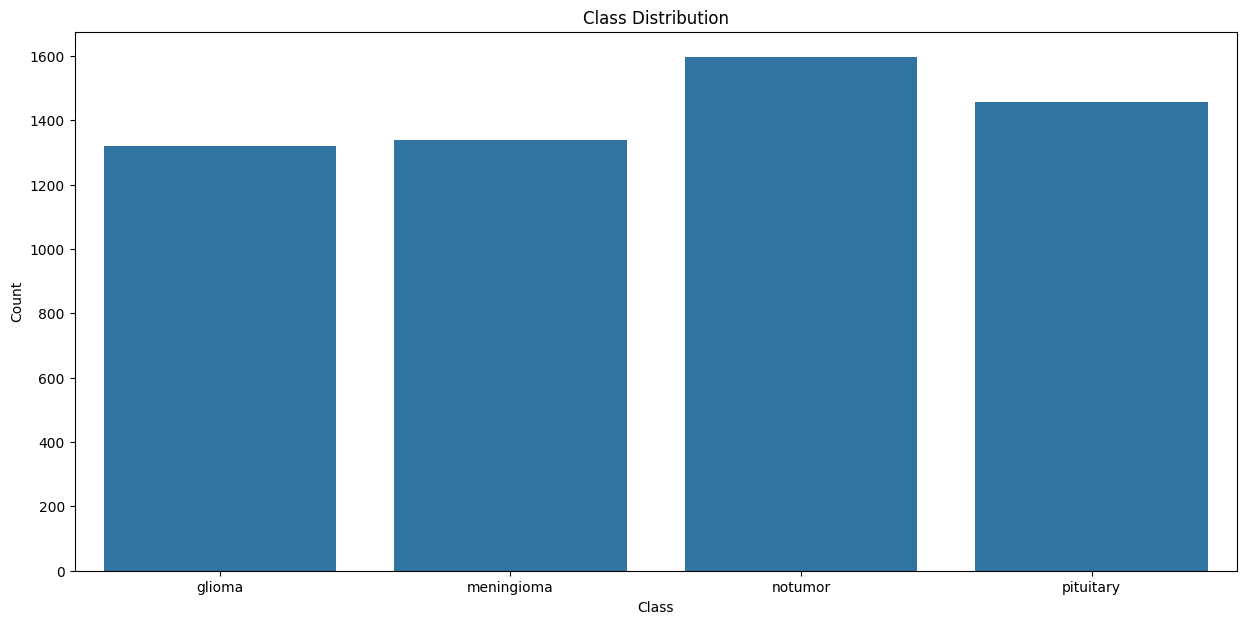

In [48]:
# Create the bar plot
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x='Class')

plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## 3.3 **Testing Dataset Count:**



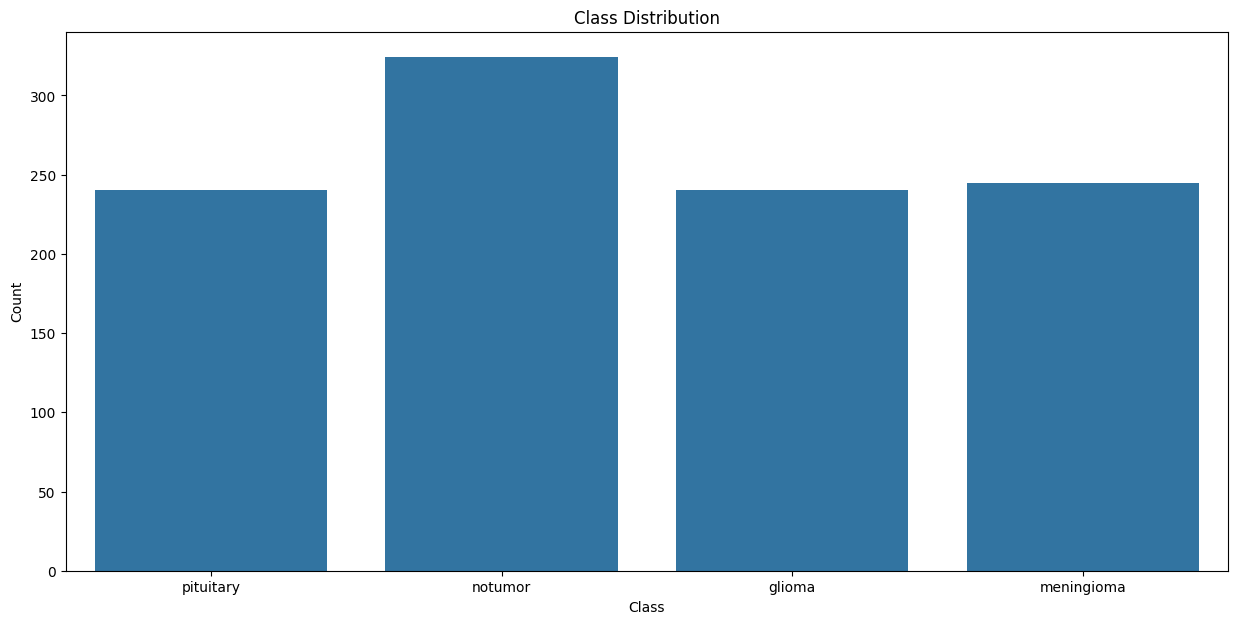

In [49]:
# Create the bar plot
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=test_df, x='Class')

plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## 3.3 **Validation Dataset Count:**

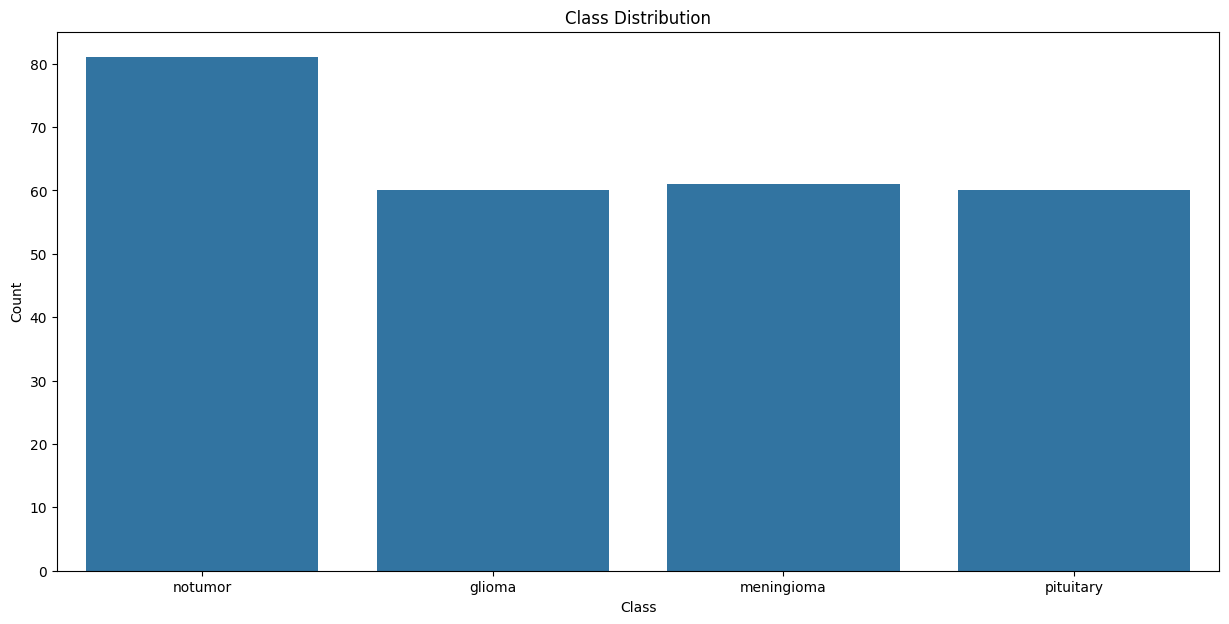

In [50]:
# Create the bar plot
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=valid_df, x='Class')

plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## 3.4 **Scaling the Datasets:**

Reason: To make sure the three dataset’s images are correct width and height.

In [52]:
batch_size = 64

#resize images to same size
img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = batch_size,
    target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = batch_size,
    target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(
    test_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = 16,
    target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 262 validated image filenames belonging to 4 classes.
Found 1049 validated image filenames belonging to 4 classes.


## 3.5 **Visualize Dataset Images:**

Generate a grid of 16 images from the ImageDataGenerator (tr_gen) and displays them.

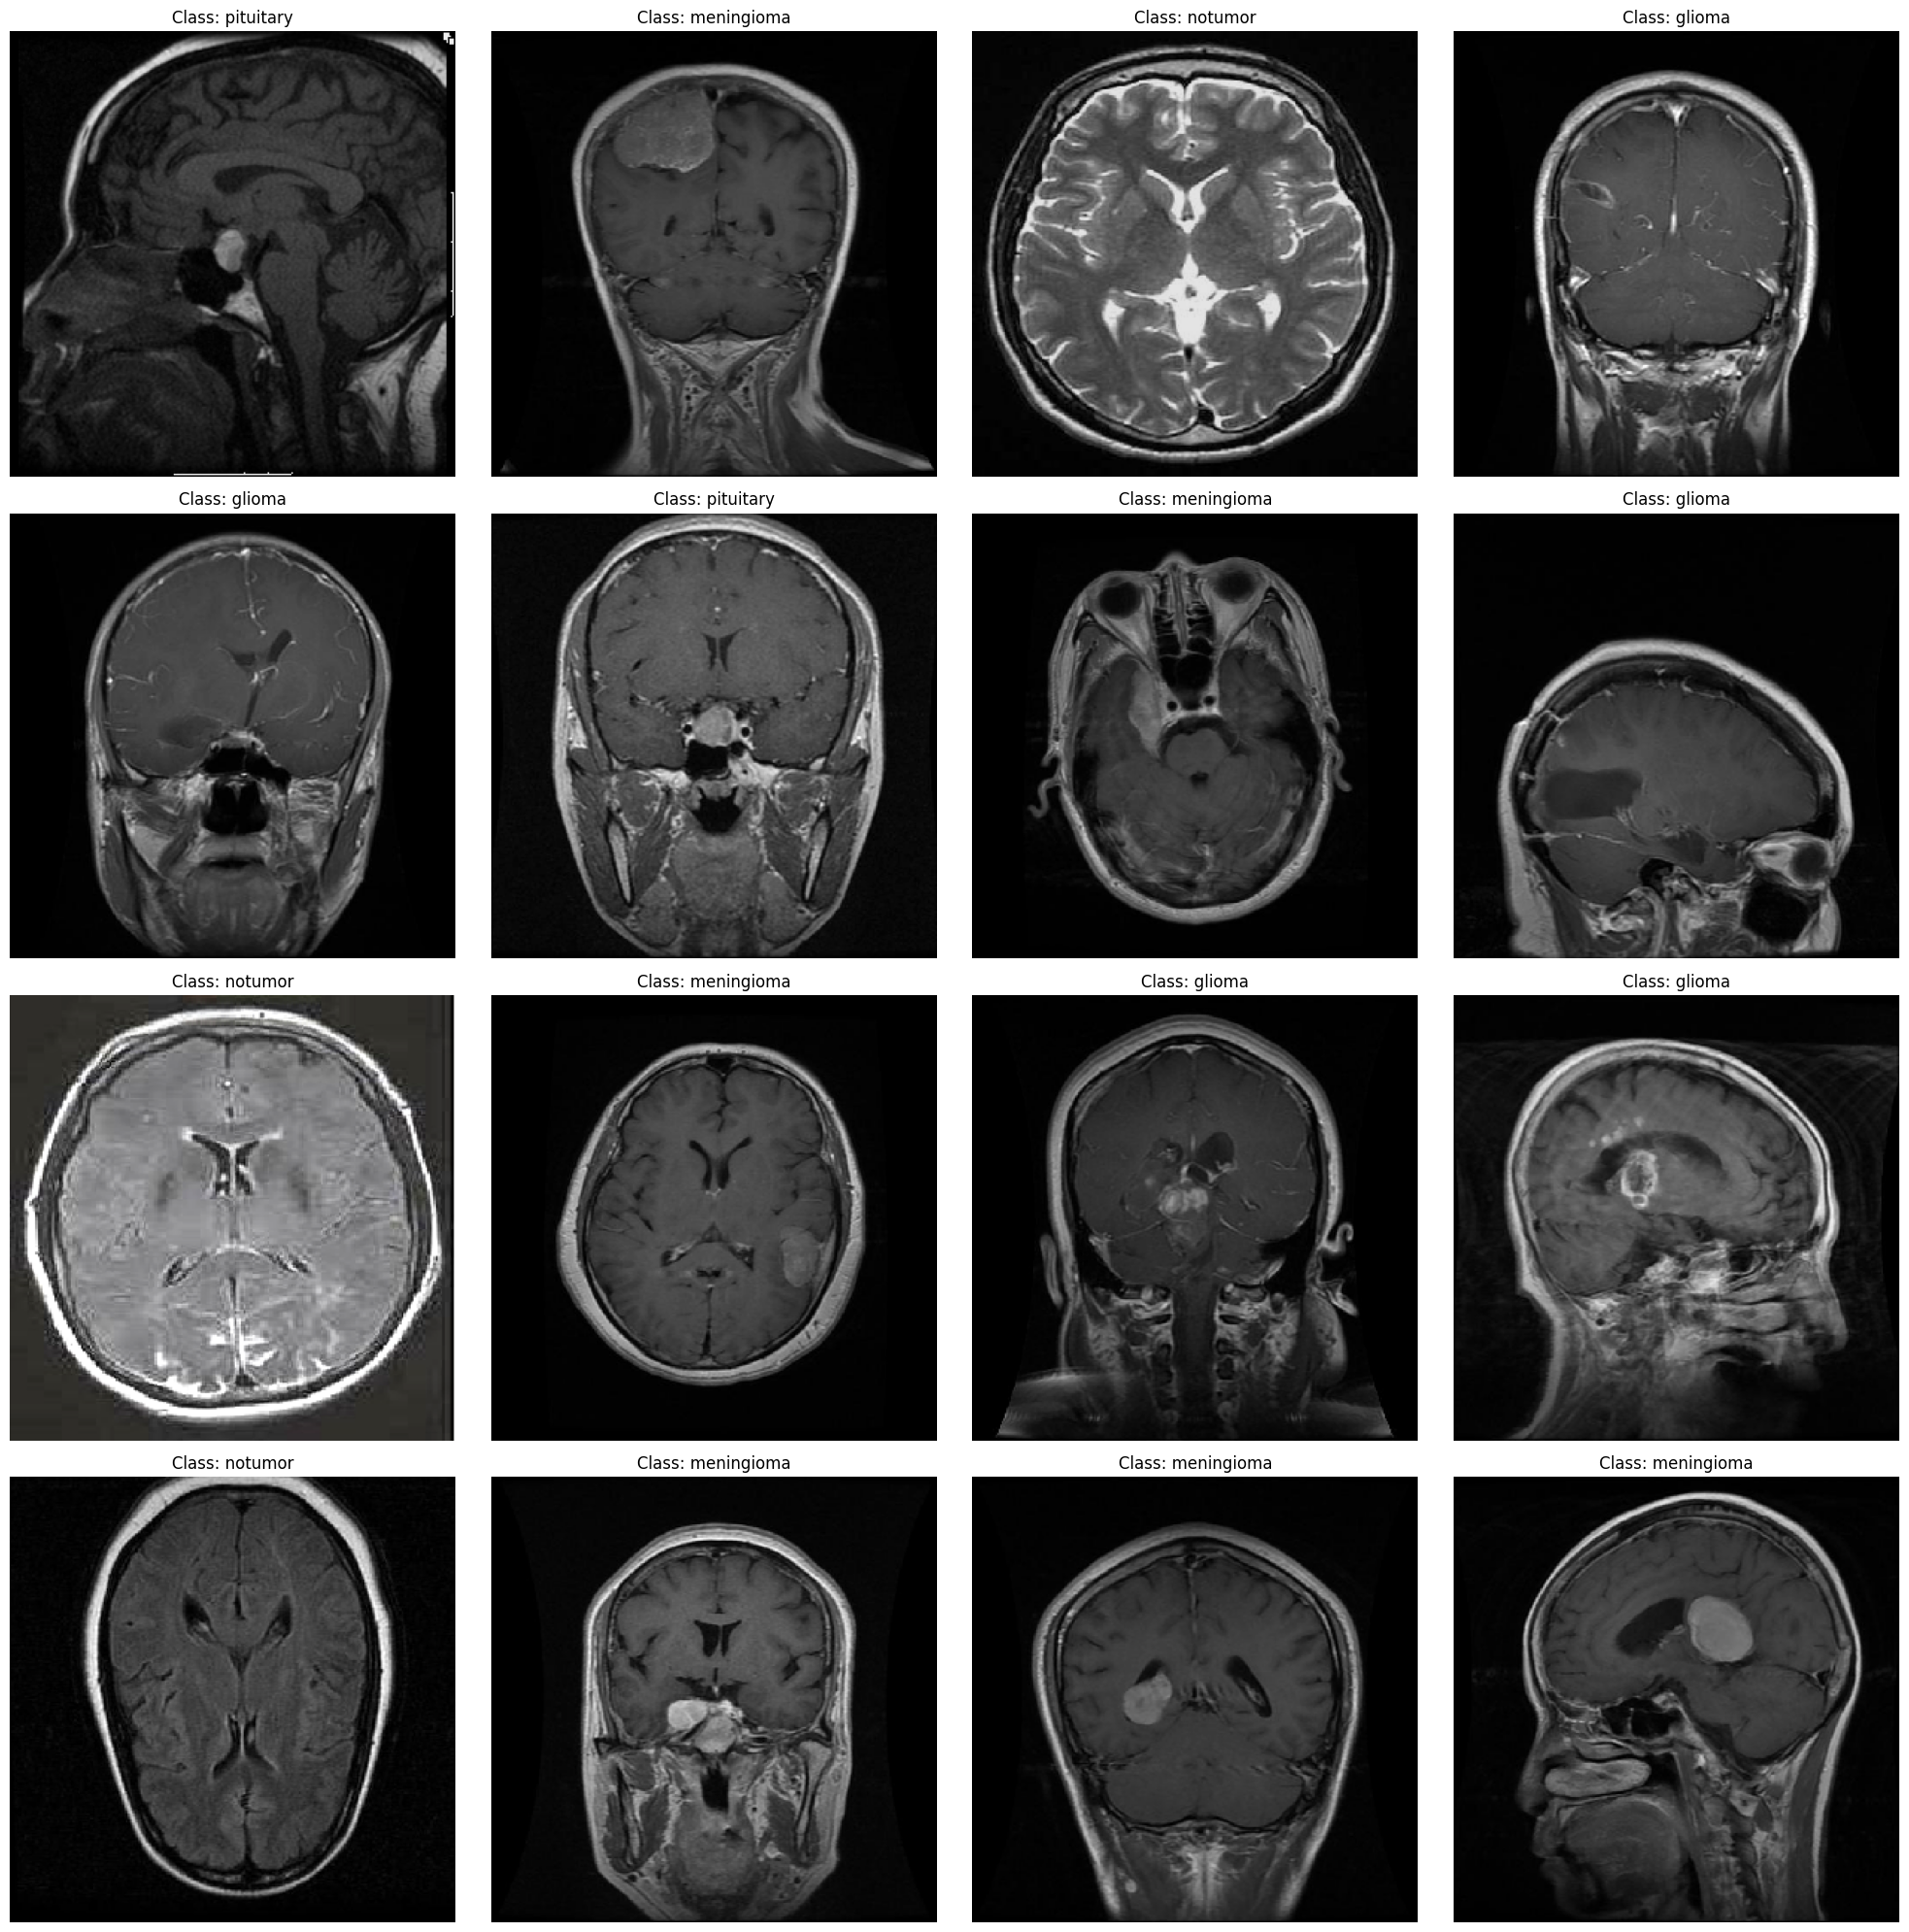

In [54]:
# Set up the figure size for the plot
plt.figure(figsize=(20, 20))

# Loop through the first 16 images to plot them
for i in range(16):
    # Create a subplot in a 4x4 grid
    plt.subplot(4, 4, i+1)

    # Fetch the next batch of images and labels from the data generator
    batch = next(tr_gen)

    # Extract the first image from the batch
    image = batch[0][0]

    # Extract the first label from the batch (assumed to be one-hot encoded)
    label = batch[1][0]

    # Display the image
    plt.imshow(image)

    # Get the class index by finding the position of the highest value in the one-hot encoded label
    class_index = np.argmax(label)

    # Retrieve the list of class names and their corresponding indices from the generator
    class_names = list(tr_gen.class_indices.keys())   # List of class names
    class_indices = list(tr_gen.class_indices.values()) # List of indices corresponding to classes

    # Find the index position in the class indices list that matches the class index
    index_position = class_indices.index(class_index)

    # Use the index position to get the corresponding class name
    class_name = class_names[index_position]

    # Add a title to the subplot showing the class name of the image
    plt.title(f"Class: {class_name}")

    # Remove the axes for a cleaner visualization
    plt.axis('off')

# Adjust the spacing between subplots to prevent overlap
plt.tight_layout()

# Display the complete plot with 16 images and their corresponding class labels
plt.show()
